In [39]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.model_selection import train_test_split ,  KFold

import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
#matplotlib inline
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [40]:
df = pd.read_csv(r'C:\Users\amuthumanikandan\PycharmProjects\Meachine Learning\Introduction to NLP\authors.csv')


In [41]:
df.head(10)

id                                               text author
0  id26305  This process, however, afforded me no means of...    EAP
1  id17569  It never once occurred to me that the fumbling...    HPL
2  id11008  In his left hand was a gold snuff box, from wh...    EAP
3  id27763  How lovely is spring As we looked from Windsor...    MWS
4  id12958  Finding nothing else, not even gold, the Super...    HPL
5  id22965  A youth passed in solitude, my best years spen...    MWS
6  id09674  The astronomer, perhaps, at this point, took r...    EAP
7  id13515        The surcingle hung in ribands from my body.    EAP
8  id19322  I knew that you could not say to yourself 'ste...    EAP
9  id00912  I confess that neither the structure of langua...    MWS

In [42]:
df.iloc[5]['text']

'A youth passed in solitude, my best years spent under your gentle and feminine fosterage, has so refined the groundwork of my character that I cannot overcome an intense distaste to the usual brutality exercised on board ship: I have never believed it to be necessary, and when I heard of a mariner equally noted for his kindliness of heart and the respect and obedience paid to him by his crew, I felt myself peculiarly fortunate in being able to secure his services.'

In [43]:
df.shape

(19579, 3)

In [44]:
EAP_LEN = df[df['author'] == 'EAP' ].shape[0]
HPL_LEN = df[df['author'] == 'HPL'].shape[0]
MWS_LEN = df[df['author'] == 'MWS'].shape[0]

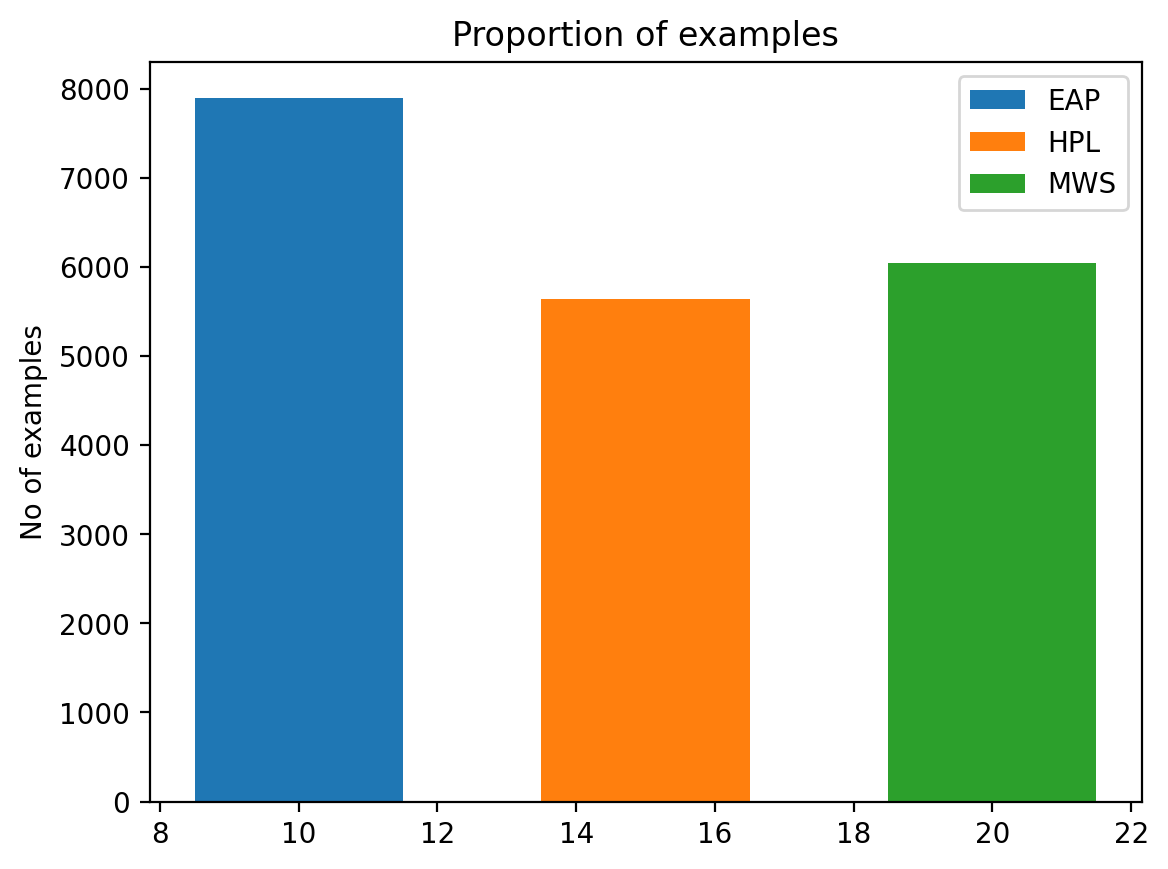

In [45]:
plt.bar(10,EAP_LEN,3, label = 'EAP')
plt.bar(15,HPL_LEN,3, label = 'HPL')
plt.bar(20,MWS_LEN,3, label = 'MWS')
plt.legend()
plt.ylabel('No of examples')
plt.title('Proportion of examples')
plt.show()

In [46]:
def remove_punctuation(text):
    '''a function for removing puctuation'''
    import string
    translator = str.maketrans('','',string.punctuation)
    return text.translate(translator)

In [47]:
remove_punctuation("shubhankit, is old")

'shubhankit is old'

In [48]:
df['text'] = df['text'].apply(remove_punctuation)
df.head(10)

id                                               text author
0  id26305  This process however afforded me no means of a...    EAP
1  id17569  It never once occurred to me that the fumbling...    HPL
2  id11008  In his left hand was a gold snuff box from whi...    EAP
3  id27763  How lovely is spring As we looked from Windsor...    MWS
4  id12958  Finding nothing else not even gold the Superin...    HPL
5  id22965  A youth passed in solitude my best years spent...    MWS
6  id09674  The astronomer perhaps at this point took refu...    EAP
7  id13515         The surcingle hung in ribands from my body    EAP
8  id19322  I knew that you could not say to yourself ster...    EAP
9  id00912  I confess that neither the structure of langua...    MWS

In [49]:
import nltk
nltk.download('stopwords')
sw = stopwords.words('english')
np.array(sw)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amuthumanikandan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [50]:
print("Number of stopwords", len(sw))

Number of stopwords 179


In [51]:
def stopwords(text):
    '''a function for removing stopword'''
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    return"".join(text)

In [52]:
df['text'] = df['text'].apply(stopwords)
df.head(10)

id                                               text author
0  id26305  processhoweveraffordedmeansascertainingdimensi...    EAP
1  id17569              neveroccurredfumblingmightmeremistake    HPL
2  id11008  lefthandgoldsnuffboxcaperedhillcuttingmannerfa...    EAP
3  id27763  lovelyspringlookedwindsorterracesixteenfertile...    MWS
4  id12958  findingnothingelseevengoldsuperintendentabando...    HPL
5  id22965  youthpassedsolitudebestyearsspentgentlefeminin...    MWS
6  id09674  astronomerperhapspointtookrefugesuggestionnonl...    EAP
7  id13515                           surcinglehungribandsbody    EAP
8  id19322  knewcouldsaystereotomywithoutbroughtthinkatomi...    EAP
9  id00912  confessneitherstructurelanguagescodegovernment...    MWS

In [53]:
count_vectorizer= CountVectorizer()
count_vectorizer.fit(df['text'])
dictionary = count_vectorizer.vocabulary_.items()

In [54]:
dictionary

dict_items([('processhoweveraffordedmeansascertainingdimensionsdungeonmightmakecircuitreturnpointwhencesetwithoutawarefactperfectlyuniformseemedwall', 12899), ('neveroccurredfumblingmightmeremistake', 10851), ('lefthandgoldsnuffboxcaperedhillcuttingmannerfantasticstepstooksnuffincessantlyairgreatestpossibleselfsatisfaction', 8455), ('lovelyspringlookedwindsorterracesixteenfertilecountiesspreadbeneathspeckledhappycottageswealthiertownslookedformeryearsheartcheeringfair', 9235), ('findingnothingelseevengoldsuperintendentabandonedattemptsperplexedlookoccasionallystealscountenancesitsthinkingdesk', 5483), ('youthpassedsolitudebestyearsspentgentlefemininefosteragerefinedgroundworkcharactercannotovercomeintensedistasteusualbrutalityexercisedboardshipneverbelievednecessaryheardmarinerequallynotedkindlinessheartrespectobediencepaidcrewfeltpeculiarlyfortunateablesecureservices', 19534), ('astronomerperhapspointtookrefugesuggestionnonluminosityanalogysuddenlyletfall', 1007), ('surcinglehungriban

In [58]:
vocab = []
count = []
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
vocab_bef_stem = pd.Series(count,index=vocab)
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

<Axes: >

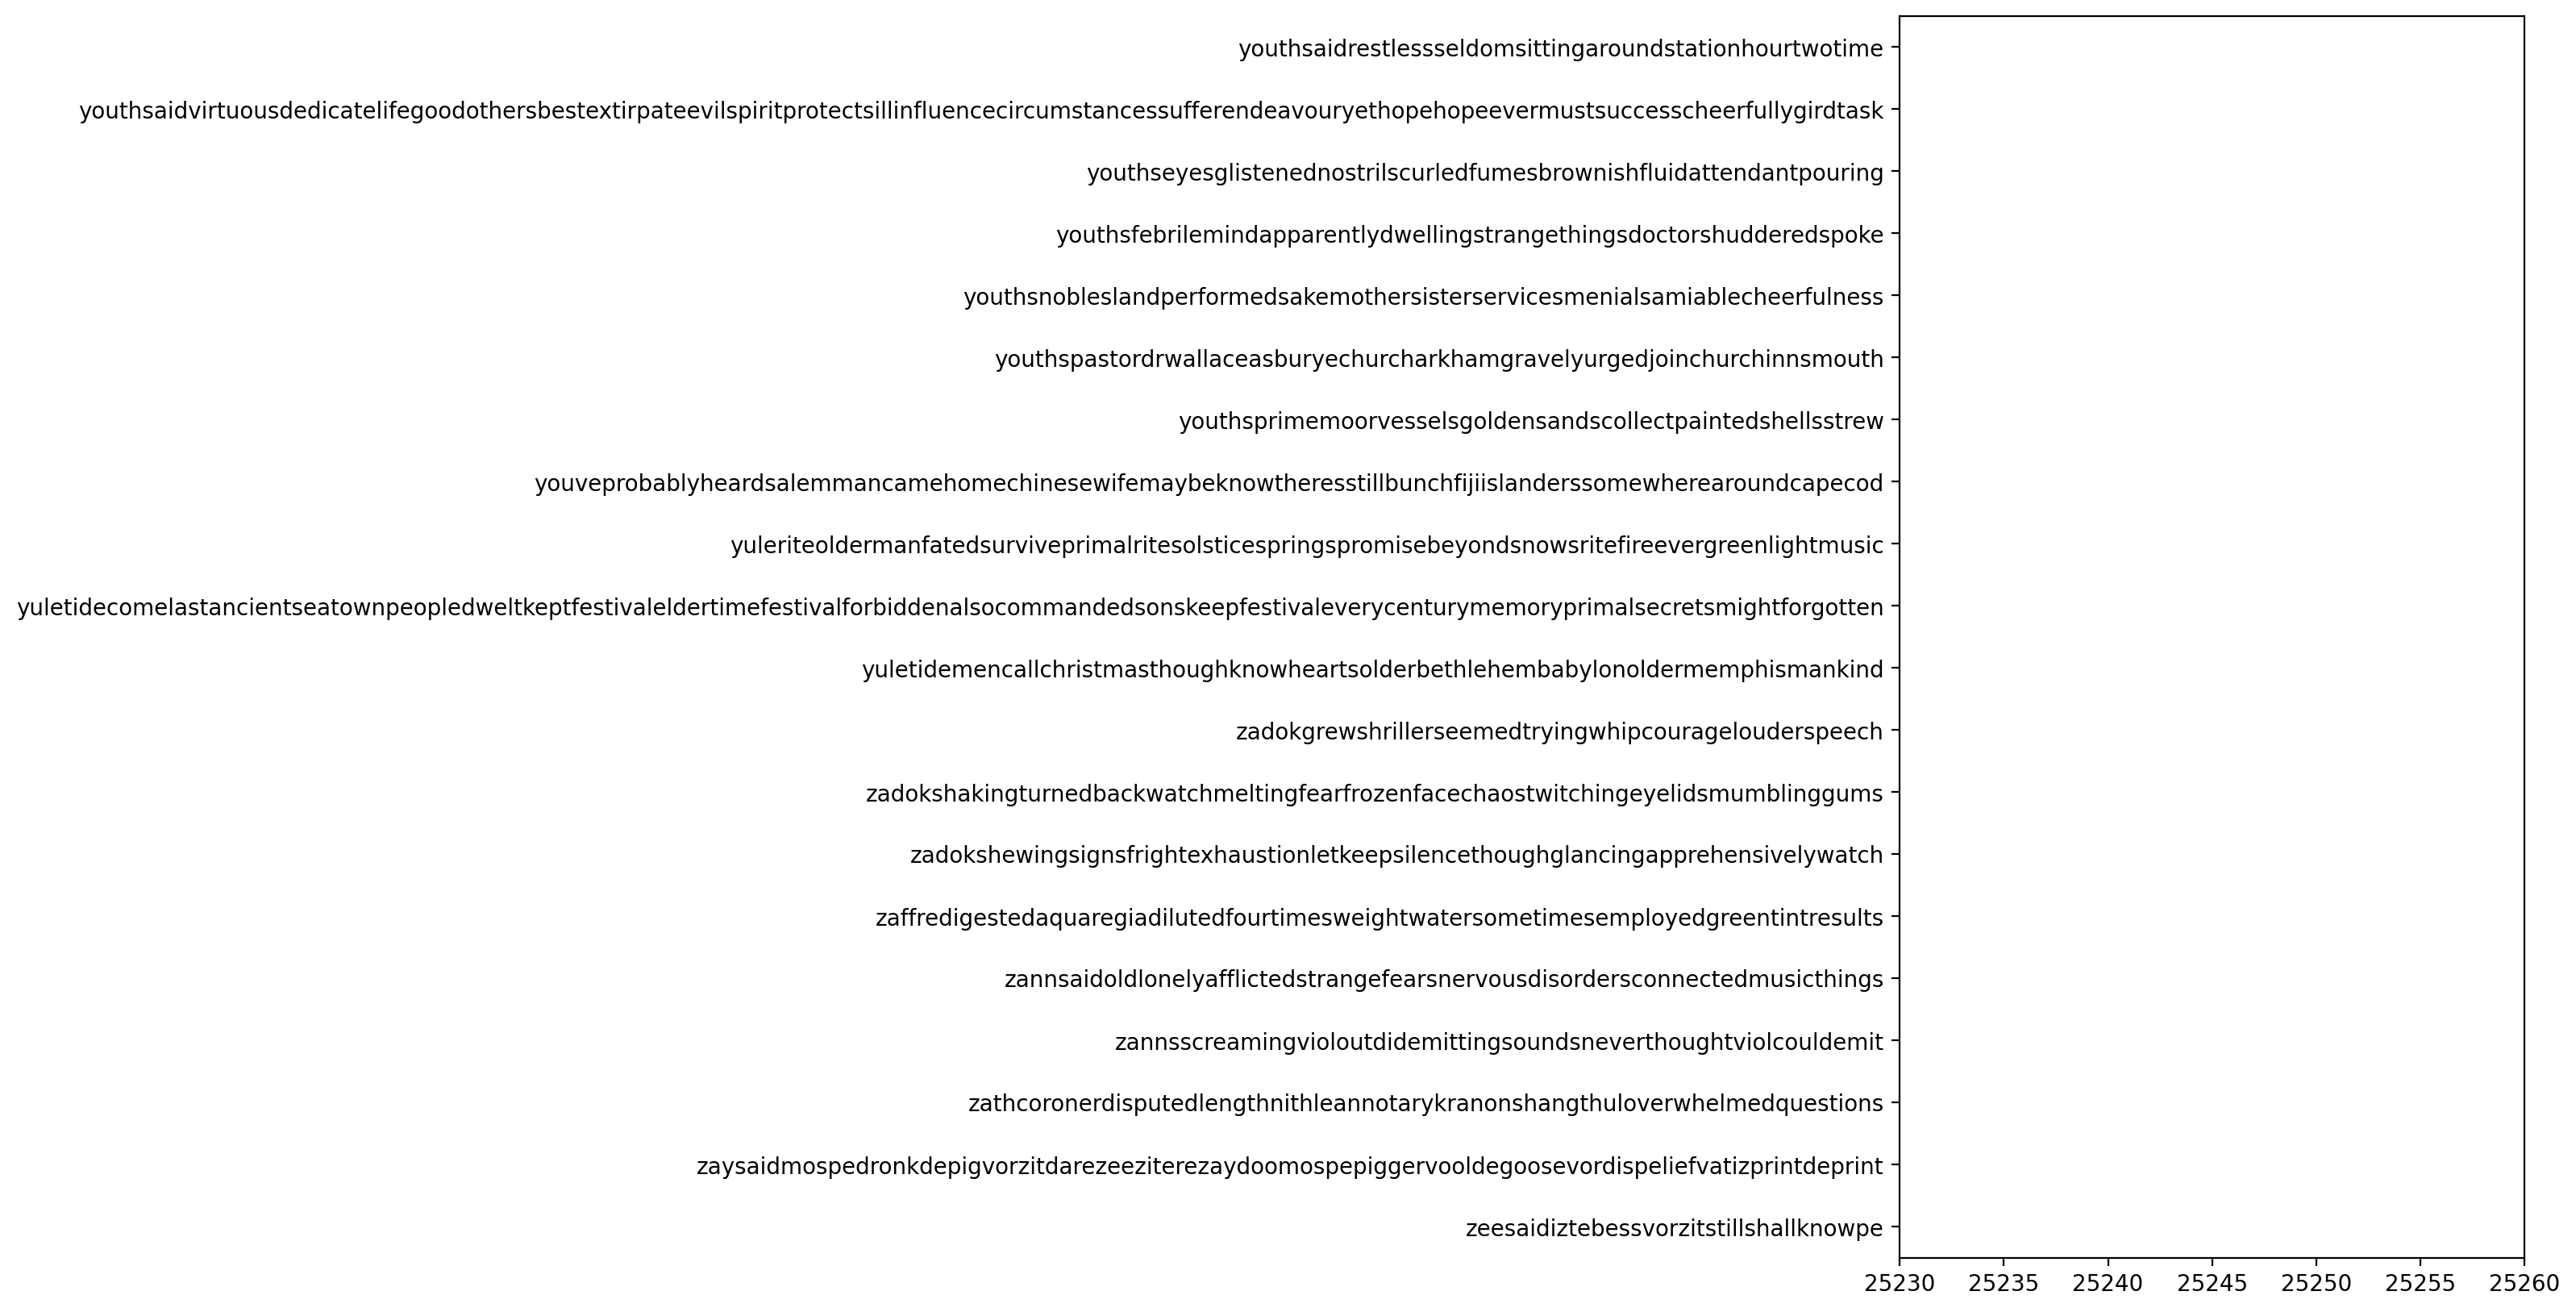

In [59]:
top_vacab = vocab_bef_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (25230, 25260))

In [61]:
#stemming function

stemmer = SnowballStemmer("english")

def stemming(text):
    '''a function which seems each word a text'''
    text = [stemmer.stem(word) for word in text.split()]
    return" ".join(text)

In [62]:
df['text'] = df['text'].apply(stemming)
df.head(10)

id                                               text author
0  id26305  processhoweveraffordedmeansascertainingdimensi...    EAP
1  id17569               neveroccurredfumblingmightmeremistak    HPL
2  id11008  lefthandgoldsnuffboxcaperedhillcuttingmannerfa...    EAP
3  id27763  lovelyspringlookedwindsorterracesixteenfertile...    MWS
4  id12958  findingnothingelseevengoldsuperintendentabando...    HPL
5  id22965  youthpassedsolitudebestyearsspentgentlefeminin...    MWS
6  id09674  astronomerperhapspointtookrefugesuggestionnonl...    EAP
7  id13515                           surcinglehungribandsbodi    EAP
8  id19322  knewcouldsaystereotomywithoutbroughtthinkatomi...    EAP
9  id00912  confessneitherstructurelanguagescodegovernment...    MWS

In [63]:
tfid_vectorizer = TfidfVectorizer()
tfid_vectorizer.fit(df['text'])

TfidfVectorizer()

In [65]:
dictionary = tfid_vectorizer.vocabulary_.items()

<Axes: >

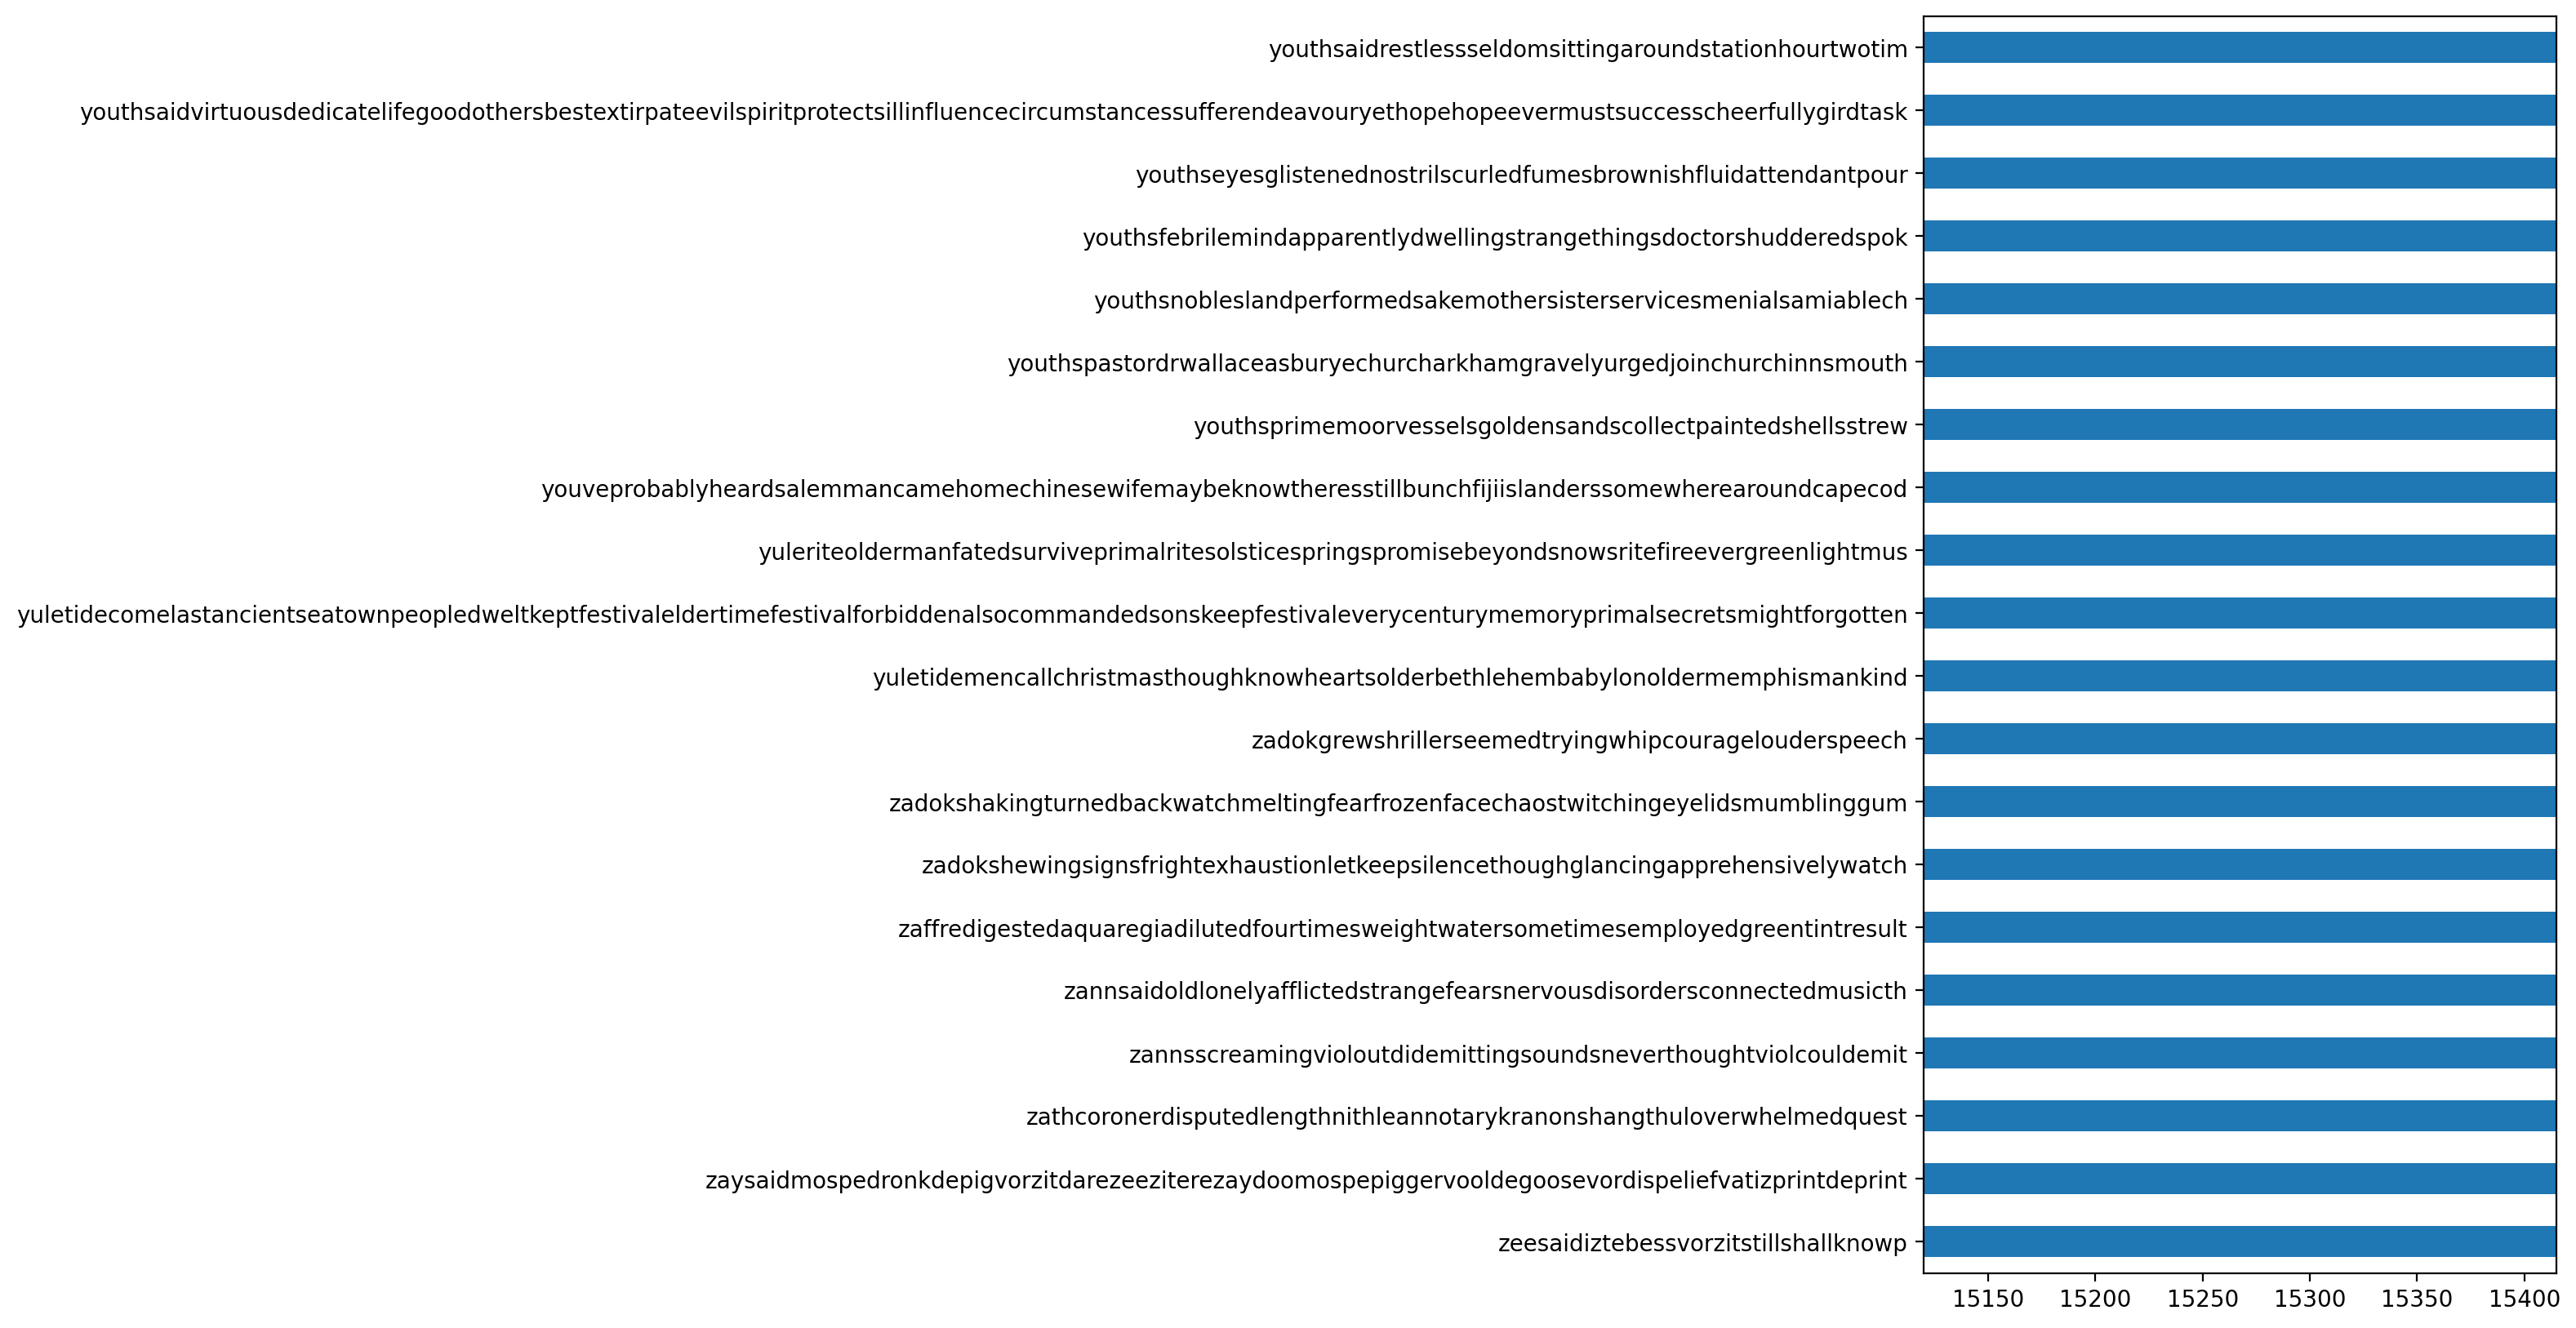

In [66]:
vocab = []
count = []
for key,value in dictionary:
    vocab.append(key)
    count.append(value)

vocab_after_stem = pd.Series(count, index=vocab)
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
top_vacab=vocab_after_stem.head(20)
top_vacab.plot(kind = 'barh', figsize= (5,10), xlim= (15120,15415))

In [67]:
def length(text):
    '''a function which returns the length of text'''
    return len(text)

In [68]:
df['length'] = df['text'].apply(length)
df.head(20)

id                                               text author  length
0   id26305  processhoweveraffordedmeansascertainingdimensi...    EAP     133
1   id17569               neveroccurredfumblingmightmeremistak    HPL      36
2   id11008  lefthandgoldsnuffboxcaperedhillcuttingmannerfa...    EAP     110
3   id27763  lovelyspringlookedwindsorterracesixteenfertile...    MWS     136
4   id12958  findingnothingelseevengoldsuperintendentabando...    HPL     115
5   id22965  youthpassedsolitudebestyearsspentgentlefeminin...    MWS     267
6   id09674  astronomerperhapspointtookrefugesuggestionnonl...    EAP      76
7   id13515                           surcinglehungribandsbodi    EAP      24
8   id19322  knewcouldsaystereotomywithoutbroughtthinkatomi...    EAP     256
9   id00912  confessneitherstructurelanguagescodegovernment...    MWS      84
10  id16737  shallfindfeelinjuriesshalllearndreadrevengeday...    MWS      52
11  id16607                             barricadedpresentsecur    EAP      22
12  id19764  herbertwestneededfreshbodieslifeworkreanimatio...    HPL      51
13  id18886  farmlikegroundsextendedbackdeeplyhillalmostwhe...    HPL      56
14  id17189                              glanceshowfallacyidea    EAP      21
15  id12799  escapedmustcommencedestructivealmostendlessjou...    MWS     149
16  id08441  speechesgavecourseinterpretationfancyingdoubte...    EAP     173
17  id13117  nativesprightlinessneededundueexcitementplacid...    MWS     105
18  id14862  evenwentfarspeakslightlyhecticcoughonetimetrou...    EAP     157
19  id20836  facialaspectremarkablematuritythoughsharedmoth...    HPL     189

In [69]:
EAP_data = df[df['author'] == 'EAP']
HPL_data = df[df['author'] == 'HPL']
MWS_data = df[df['author'] == 'MWS']

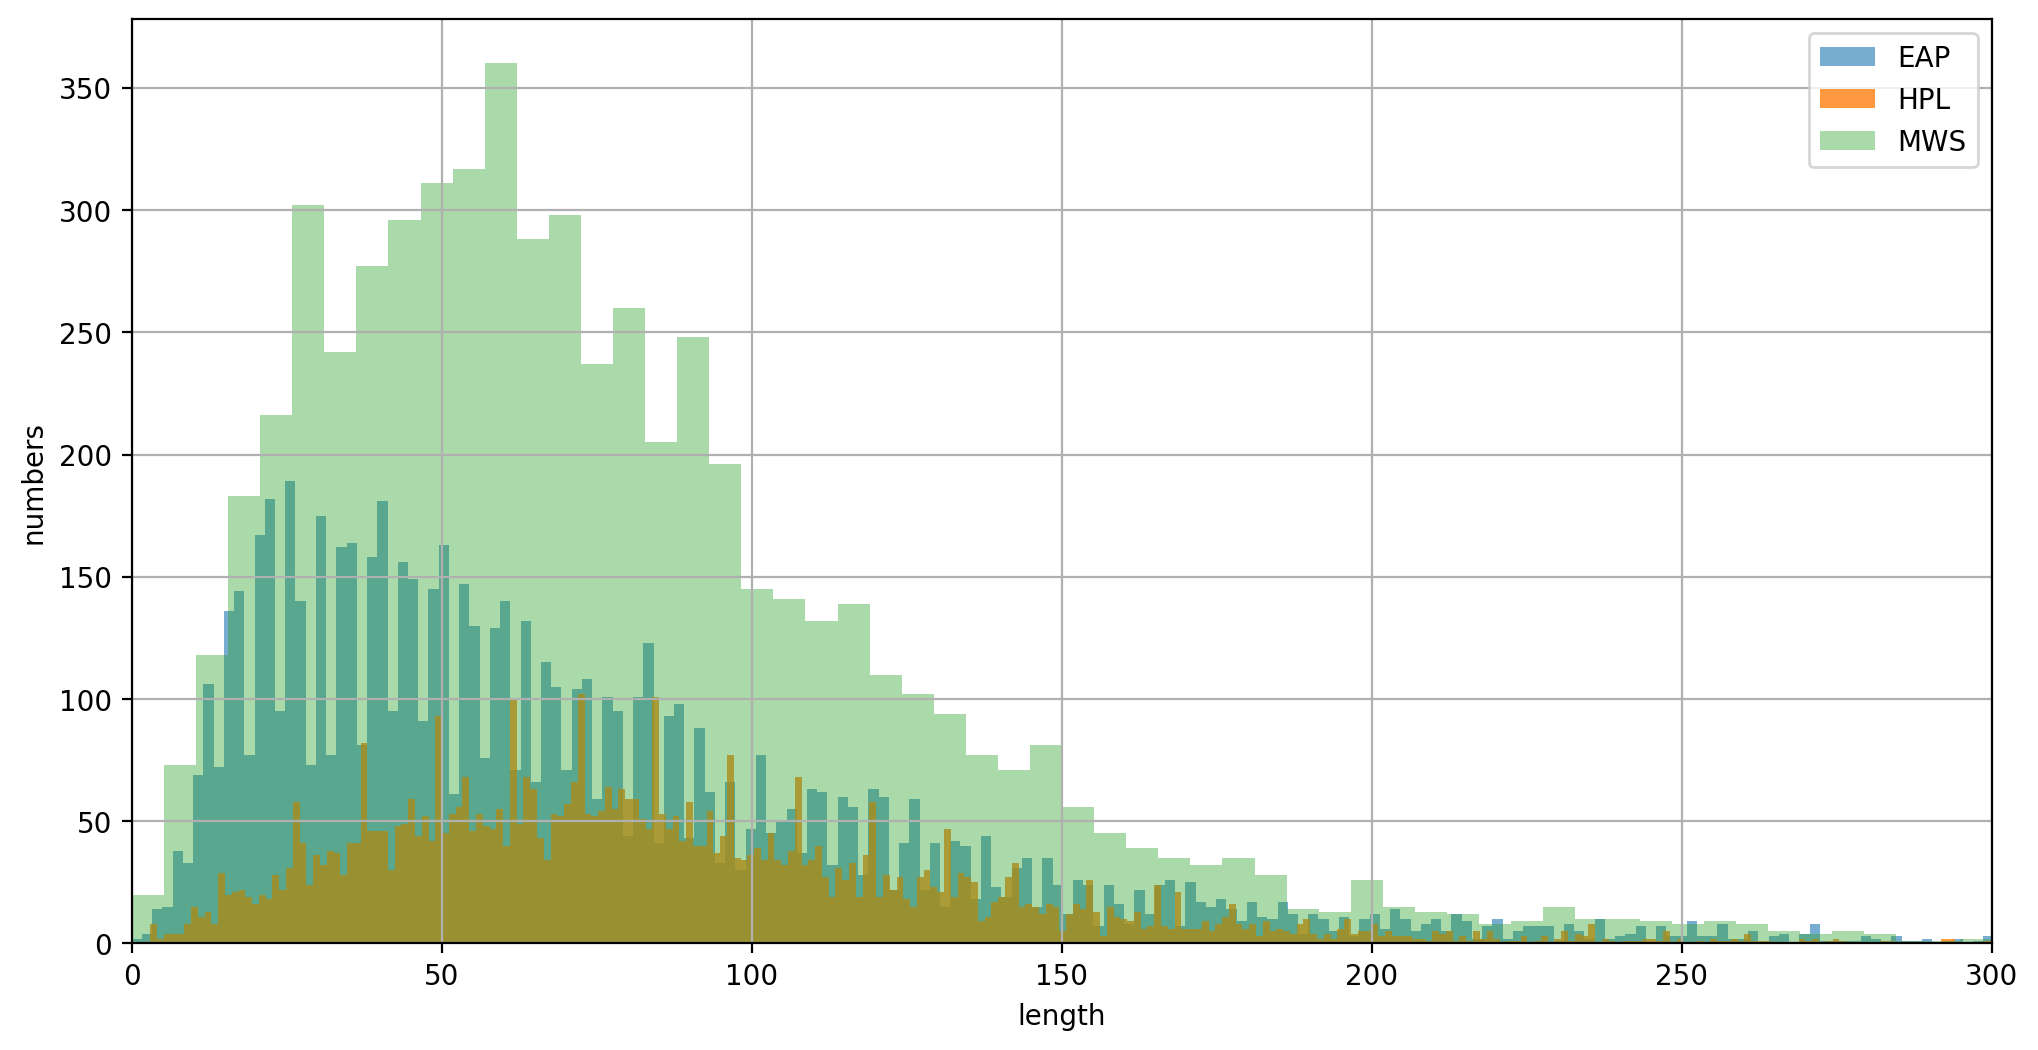

In [70]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
bins = 500
plt.hist(EAP_data['length'], alpha = 0.6, bins=bins, label='EAP')
plt.hist(HPL_data['length'], alpha = 0.8, bins=bins, label='HPL')
plt.hist(MWS_data['length'], alpha = 0.4, bins=bins, label='MWS')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,300)
plt.grid()
plt.show()

<Axes: >

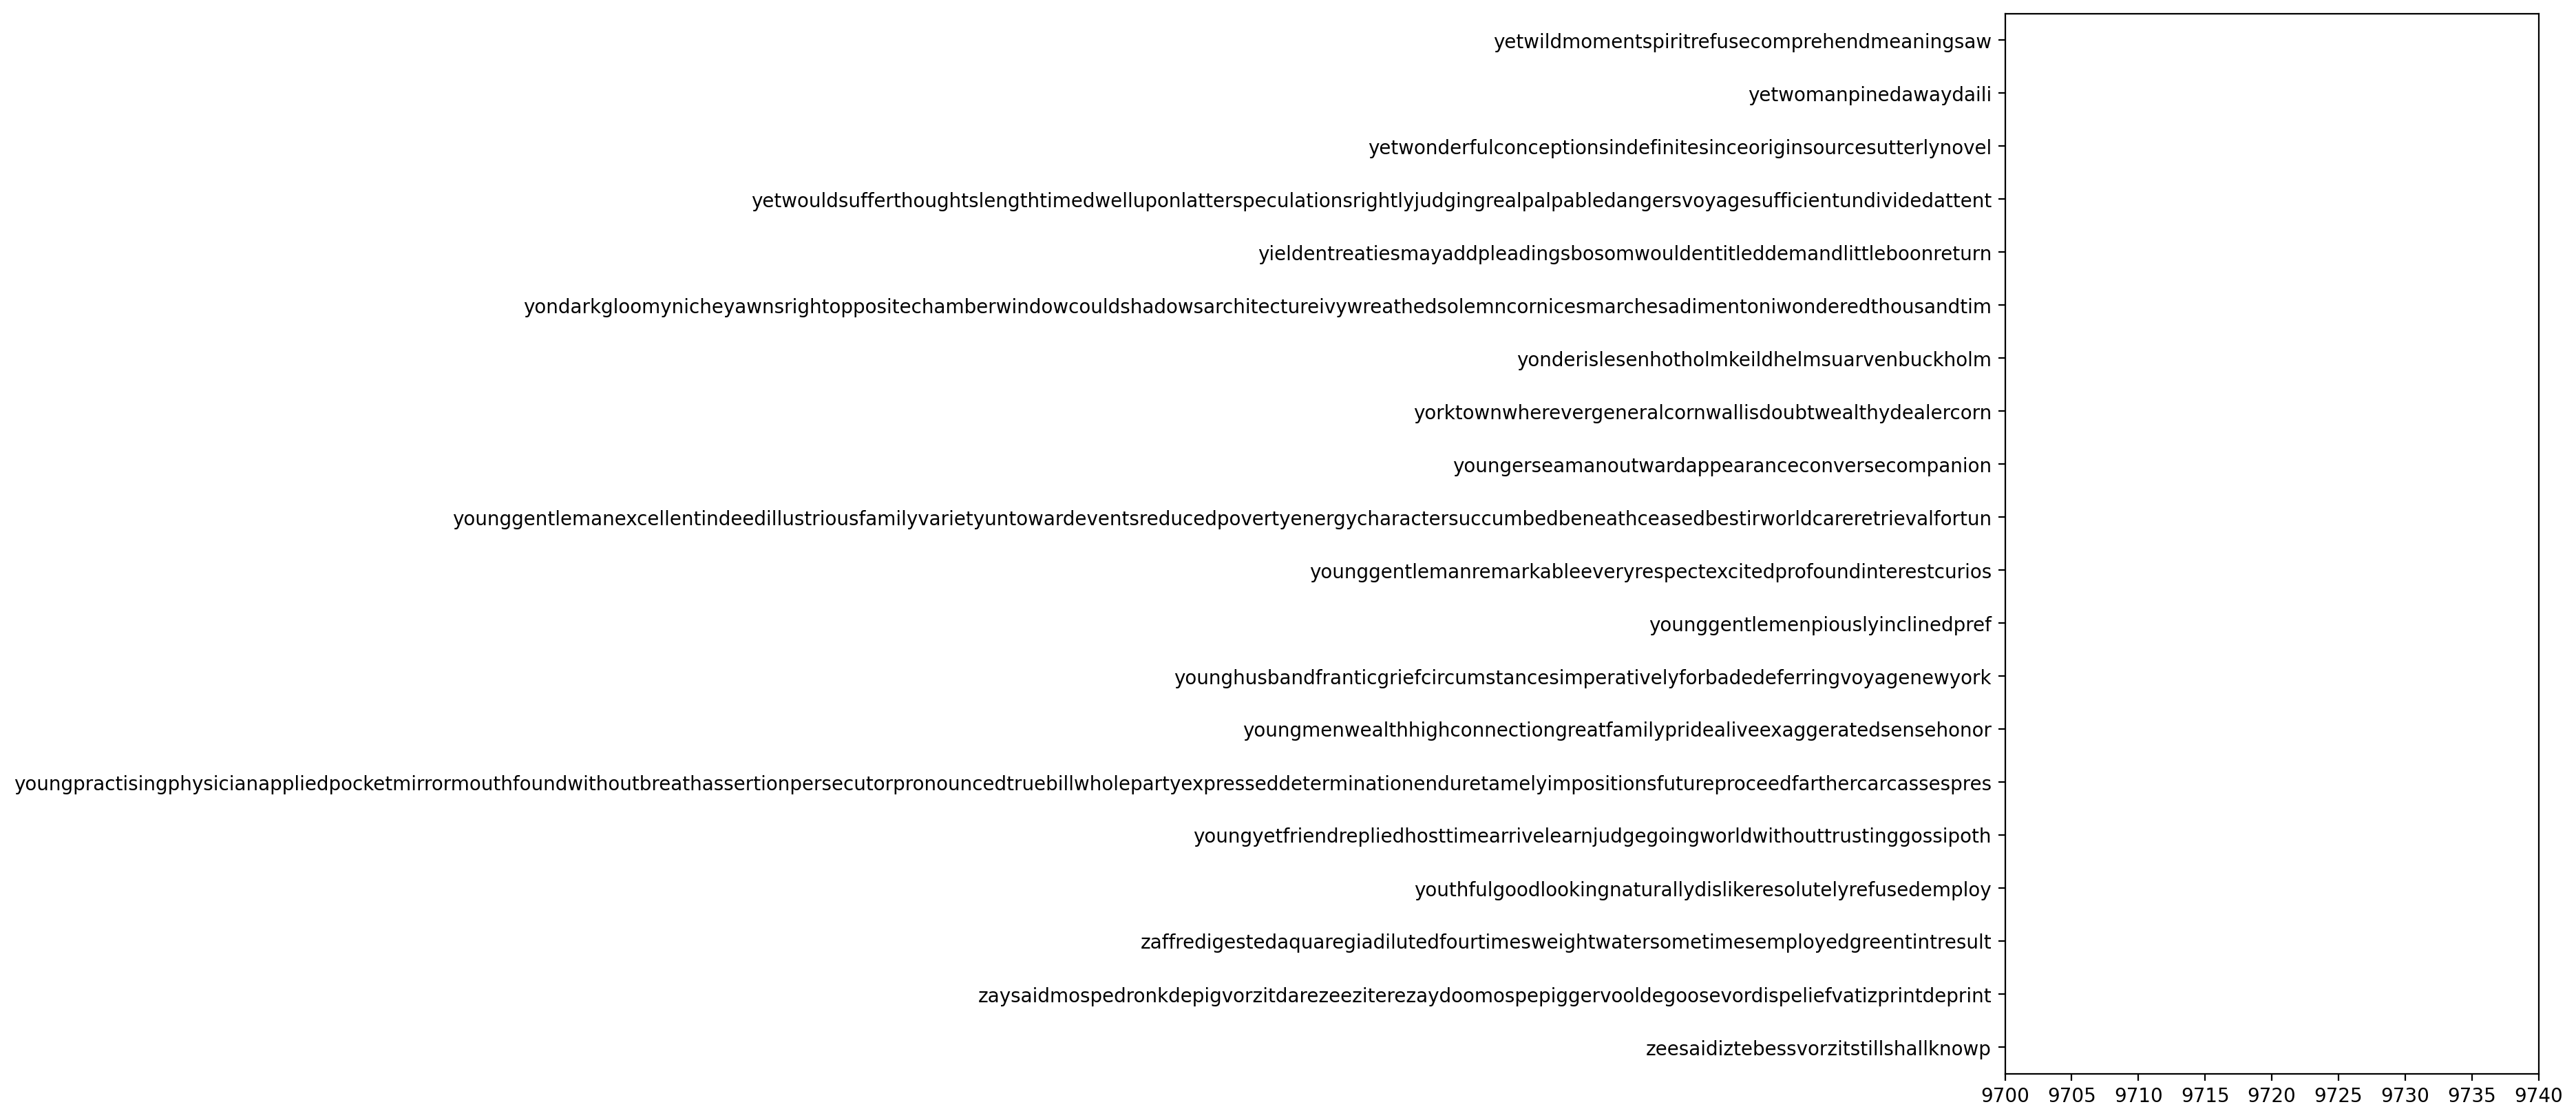

In [71]:
# create the object of tfid vectorizer
EAP_tfid_vectorizer = TfidfVectorizer()
# fit the vectorizer using the text data
EAP_tfid_vectorizer.fit(EAP_data['text'])
# collect the vocabulary items used in the vectorizer
EAP_dictionary = EAP_tfid_vectorizer.vocabulary_.items()

# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in EAP_dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
EAP_vocab = pd.Series(count, index=vocab)
# sort the dataframe
EAP_vocab = EAP_vocab.sort_values(ascending=False)
# plot of the top vocab
top_vacab = EAP_vocab.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (9700, 9740))


<Axes: >

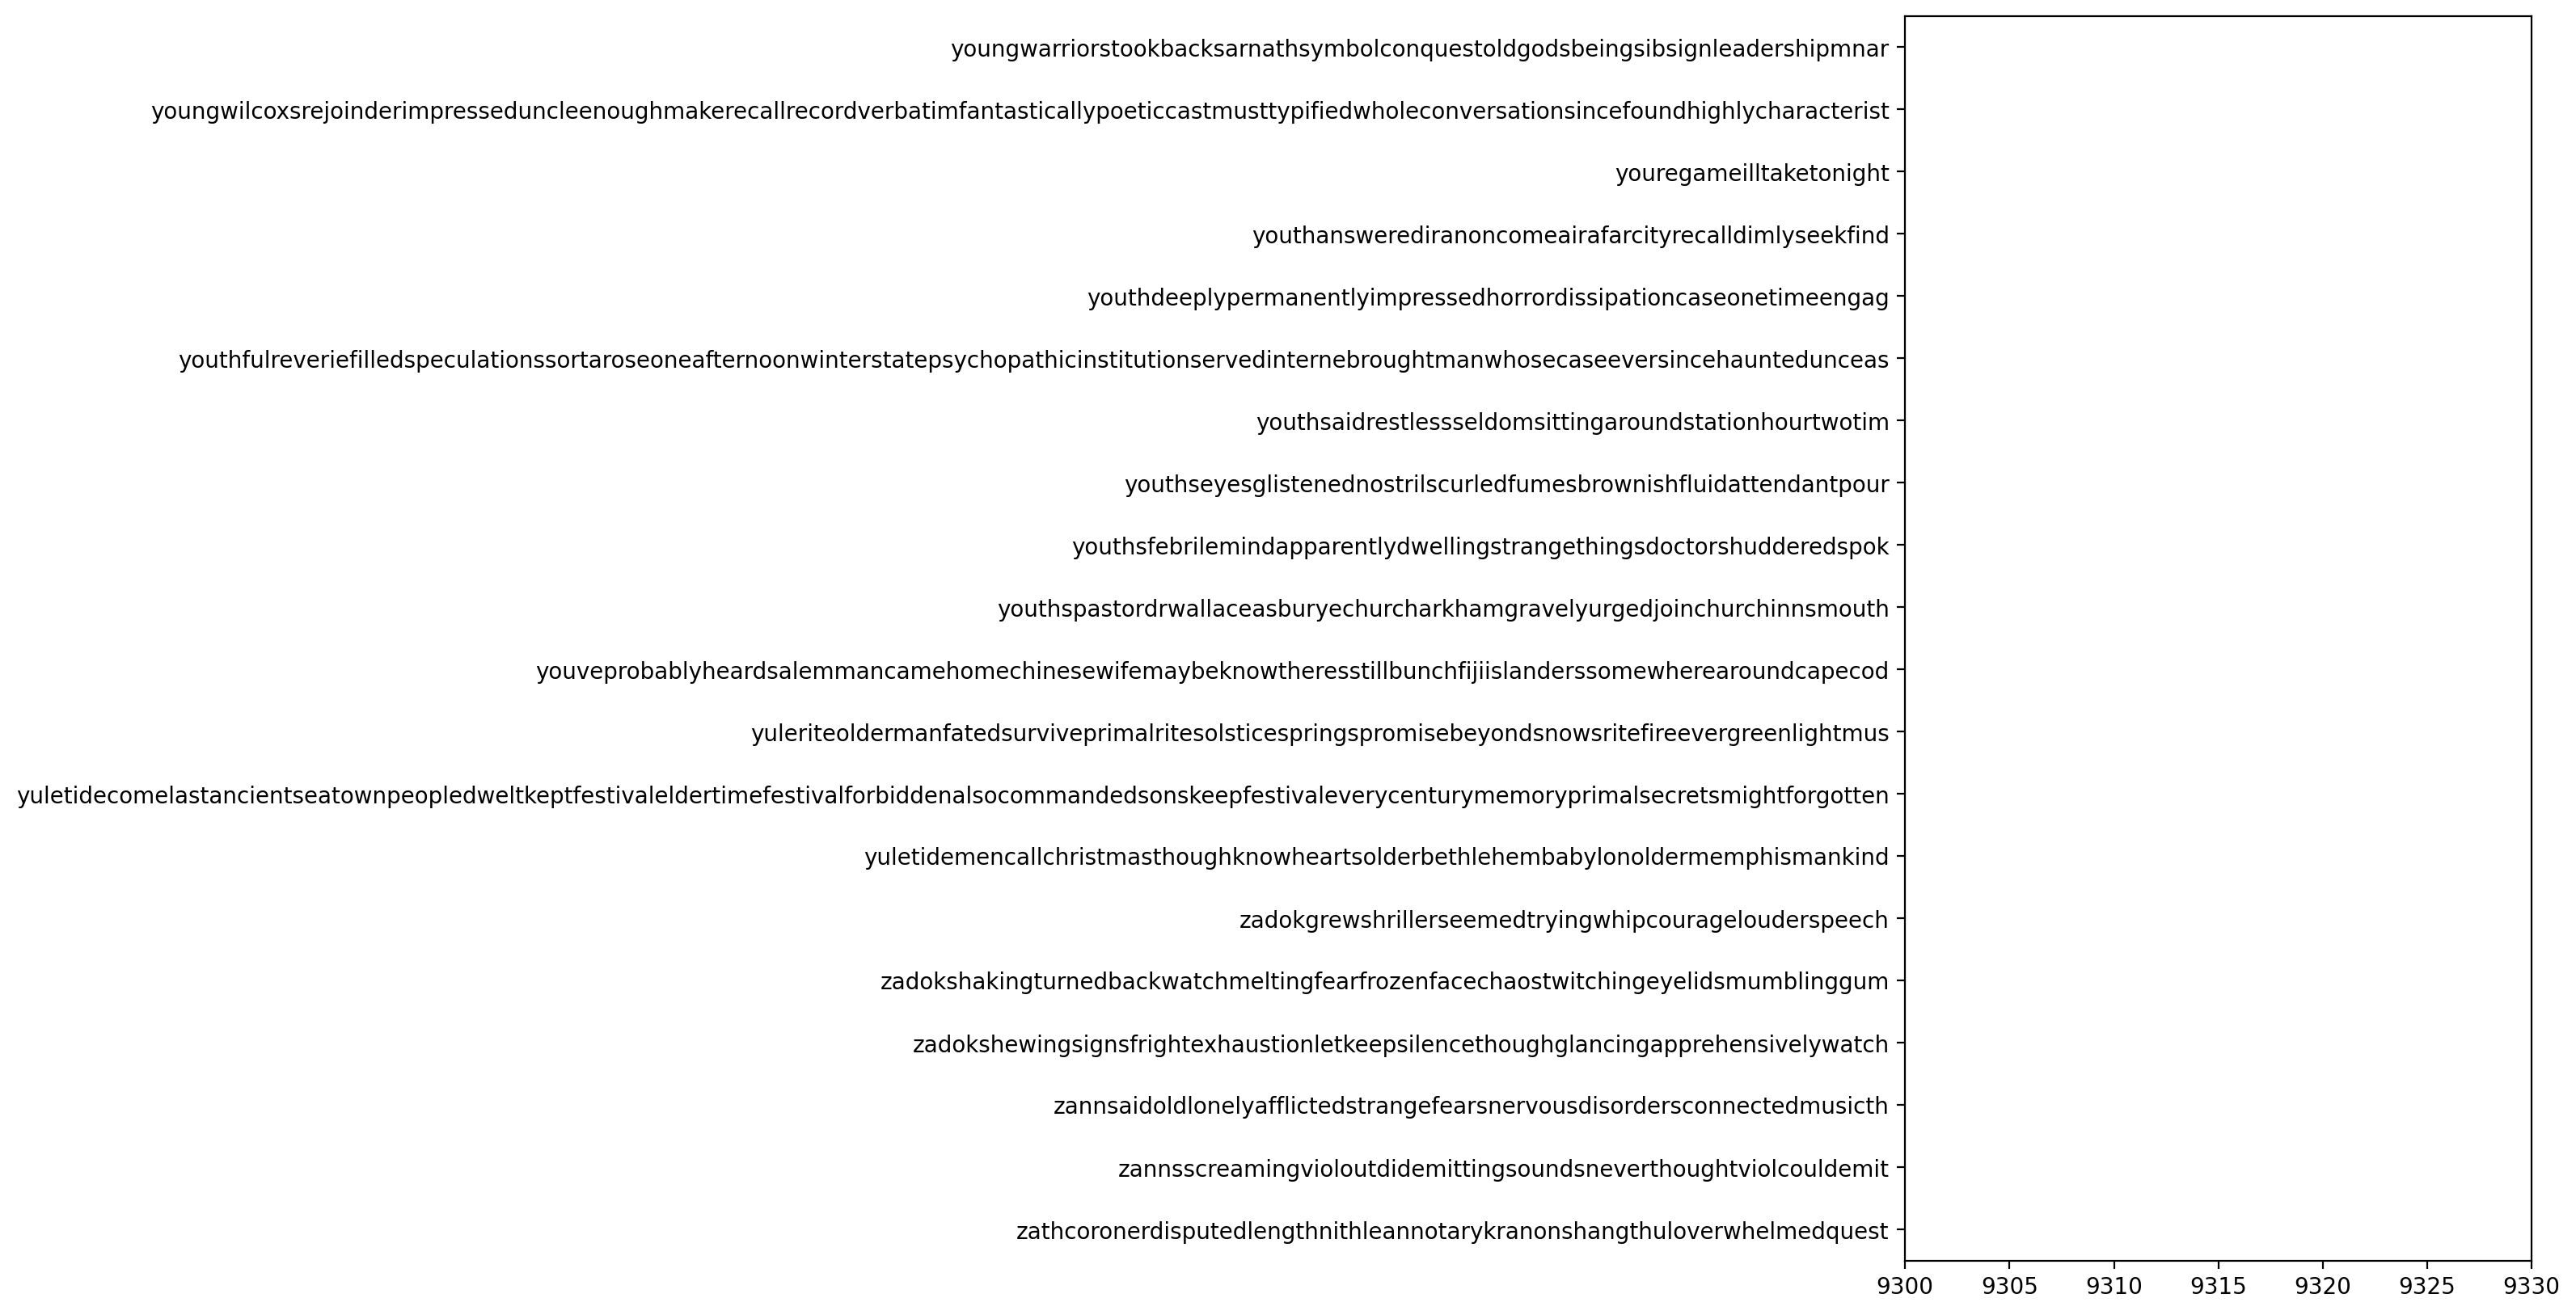

In [72]:
# create the object of tfid vectorizer
HPL_tfid_vectorizer = TfidfVectorizer()
# fit the vectorizer using the text data
HPL_tfid_vectorizer.fit(HPL_data['text'])
# collect the vocabulary items used in the vectorizer
HPL_dictionary = HPL_tfid_vectorizer.vocabulary_.items()
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in HPL_dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
HPL_vocab = pd.Series(count, index=vocab)
# sort the dataframe
HPL_vocab = HPL_vocab.sort_values(ascending=False)
# plot of the top vocab
top_vacab = HPL_vocab.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (9300, 9330))


<Axes: >

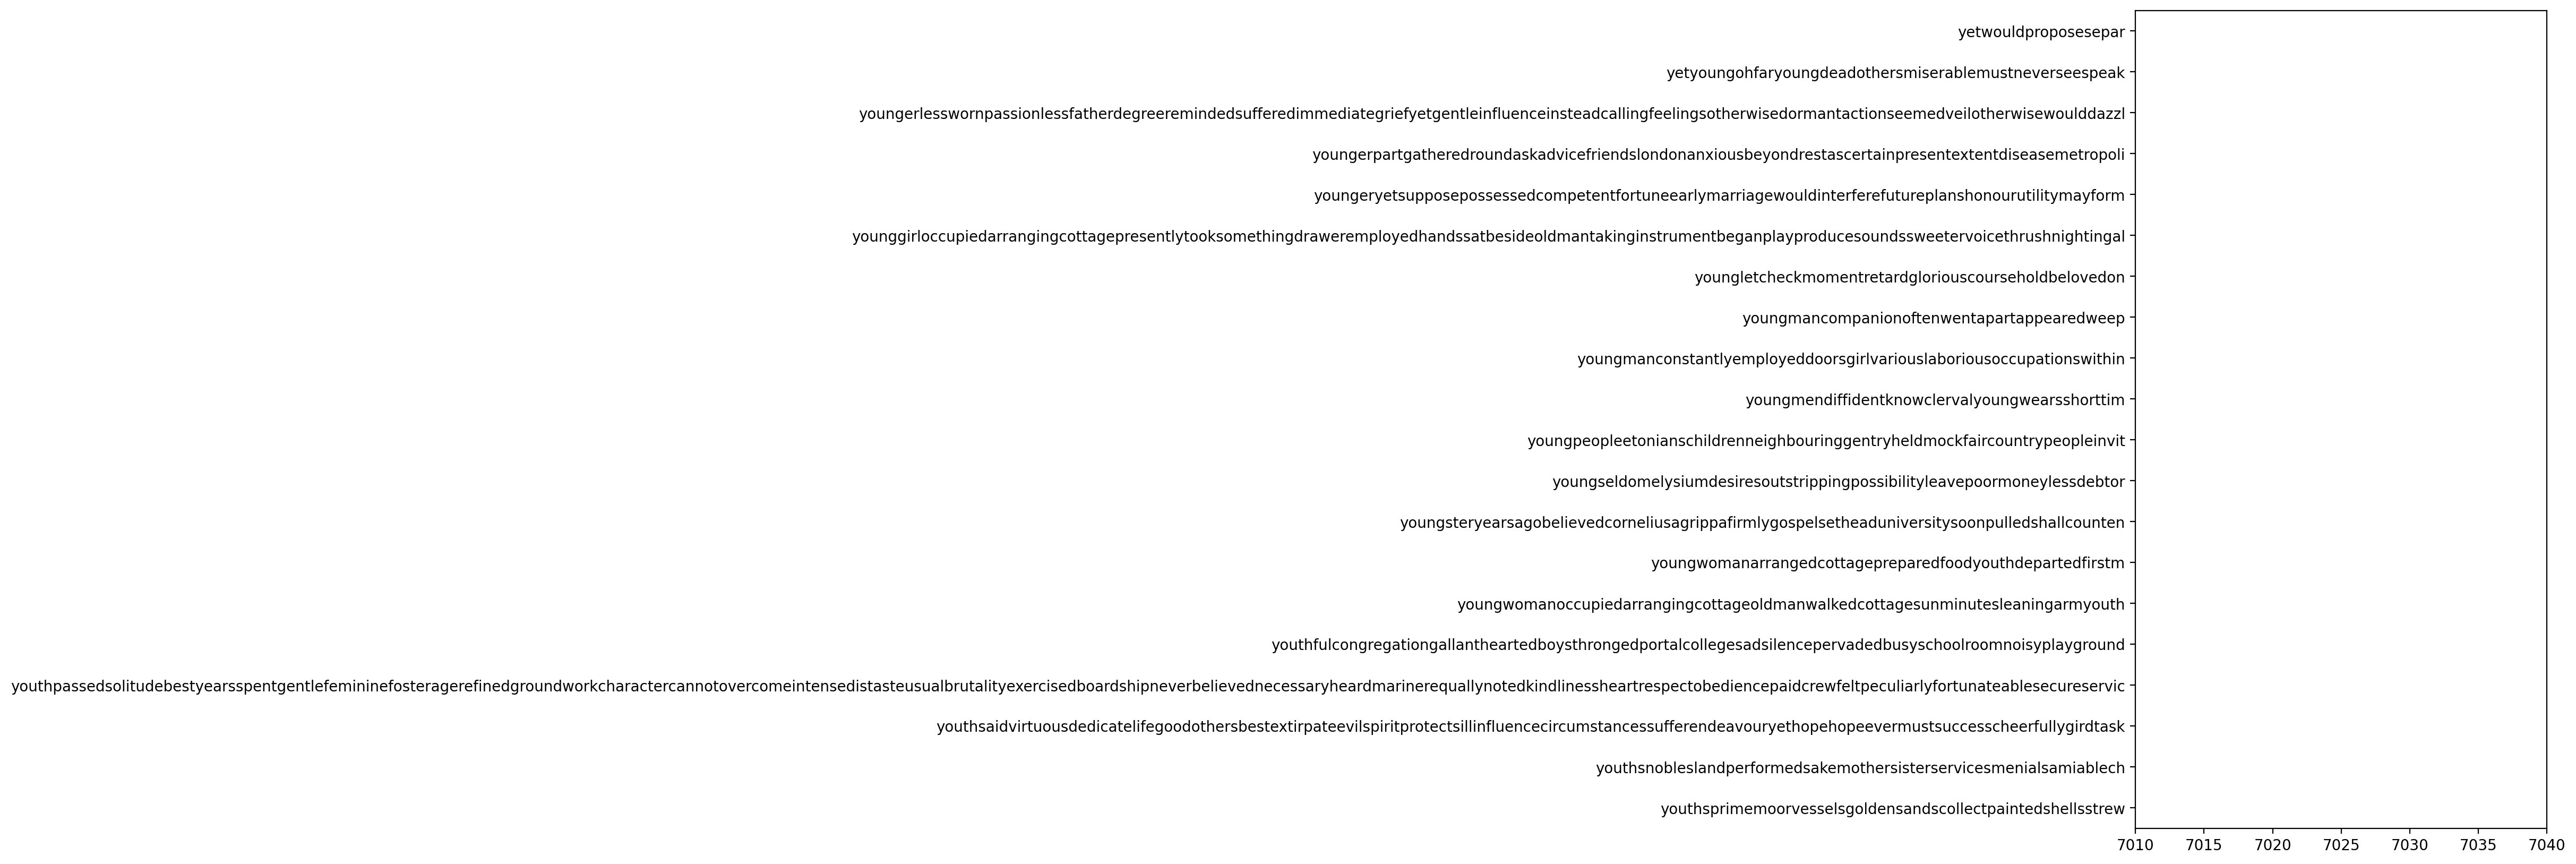

In [73]:
# create the object of tfid vectorizer
MWS_tfid_vectorizer = TfidfVectorizer()
# fit the vectorizer using the text data
MWS_tfid_vectorizer.fit(MWS_data['text'])
# collect the vocabulary items used in the vectorizer
MWS_dictionary = MWS_tfid_vectorizer.vocabulary_.items()
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated list
for key, value in MWS_dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe and vocab as index
MWS_vocab = pd.Series(count, index=vocab)
# sort the dataframe
MWS_vocab = MWS_vocab.sort_values(ascending=False)
# plot of the top vocab
top_vacab = MWS_vocab.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (7010, 7040))


In [75]:
# extract the tfid representation matrix of the text data
tfid_matrix = tfid_vectorizer.transform(df['text'])
# collect the tfid matrix in numpy array
array = tfid_matrix.todense()

In [76]:
print(tfid_matrix)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 19576 stored elements and shape (19579, 19554)>
  Coords	Values
  (0, 12899)	1.0
  (1, 10851)	1.0
  (2, 8455)	1.0
  (3, 9235)	1.0
  (4, 5483)	1.0
  (5, 19533)	1.0
  (6, 1007)	1.0
  (7, 16369)	1.0
  (8, 7988)	1.0
  (9, 2662)	1.0
  (10, 14929)	1.0
  (11, 1203)	1.0
  (12, 7003)	1.0
  (13, 5144)	1.0
  (14, 6343)	1.0
  (15, 4495)	1.0
  (16, 15737)	1.0
  (17, 10674)	1.0
  (18, 4658)	1.0
  (19, 5016)	1.0
  (20, 10805)	1.0
  (21, 15682)	1.0
  (22, 4705)	1.0
  (23, 3461)	1.0
  (24, 1540)	1.0
  :	:
  (19554, 138)	1.0
  (19555, 13290)	1.0
  (19556, 11099)	1.0
  (19557, 5991)	1.0
  (19558, 1053)	1.0
  (19559, 6092)	1.0
  (19560, 17359)	1.0
  (19561, 1095)	1.0
  (19562, 10156)	1.0
  (19563, 19438)	1.0
  (19564, 376)	1.0
  (19565, 7112)	1.0
  (19566, 13491)	1.0
  (19567, 2712)	1.0
  (19568, 6409)	1.0
  (19569, 5114)	1.0
  (19570, 10704)	1.0
  (19571, 18380)	1.0
  (19572, 3719)	1.0
  (19573, 16138)	1.0
  (19574, 2898)	1.0
  (19575, 8707)	1

In [77]:
# store the tf-idf array into pandas dataframe
df = pd.DataFrame(array)
df.shape

(19579, 19554)

In [78]:
df.head()

0      1      2      3      4      5      6      7      8      9      ...  \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   

   19544  19545  19546  19547  19548  19549  19550  19551  19552  19553  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[5 rows x 19554 columns]